In [1]:
# Data processing
import pandas as pd
import numpy as np

# Modelling
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sns

c:\Program Files\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dataset split: 56000 train rows 56000 label rows
Dataset split: 14000 test rows 14000 label rows


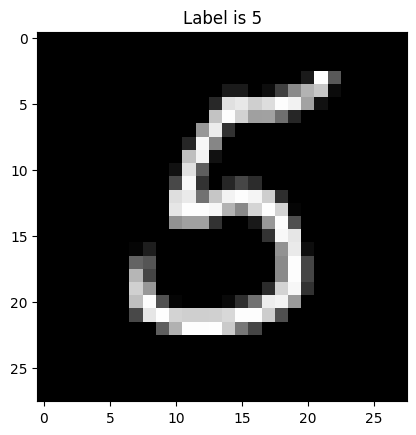

In [2]:
# Initialize
mnist = datasets.fetch_openml("mnist_784")
X, y = mnist.data, mnist.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# digits = load_digits()
print(f"Dataset split: {len(x_train)} train rows",
          f"{len(y_train)} label rows")

print(f"Dataset split: {len(x_test)} test rows",
          f"{len(y_test)} label rows")

point = np.array(x_train.iloc[0], dtype='uint8')
point = point.reshape((28, 28))

plt.title('Label is {label}'.format(label=y_train.iloc[0]))
plt.imshow(point, cmap='gray')
plt.show()

In [3]:
# Create a binary label for normal (1) and anomalies (0)
normal_class = 1
anomaly_class = 0

In [4]:
print(x_train.shape)
print(x_test.shape)

(56000, 784)
(14000, 784)


In [5]:
# normalize data
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

# convert labels to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [6]:
model = svm.OneClassSVM(nu=0.1, kernel="rbf")
model.fit(x_train)

OneClassSVM(nu=0.1)

In [7]:
# predict
prediction = model.predict(x_test)

In [8]:
# Anomalies are predicted as -1, so we will save their indexes
anomaly_indexes = np.where(prediction == -1)[0]

In [9]:
# Print the number of anomalies and accuracy
print("Number of anomalies:", len(anomaly_indexes))
print("Accuracy:", accuracy_score(y_test, (prediction == 1)))

Number of anomalies: 1356
Accuracy: 0.13157142857142856


In [10]:
# Create a classification report
report = classification_report(y_test, (prediction == -1), target_names=[str(i) for i in range(10)])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.81      0.16      1343
           1       0.01      0.01      0.01      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.00      0.00      0.00      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.08     14000
   macro avg       0.01      0.08      0.02     14000
weighted avg       0.01      0.08      0.02     14000



c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Save the anomaly indexes to a file
with open("anomaly_indexes.txt", "w") as file:
    for idx in anomaly_indexes:
        file.write(str(idx) + "\n")

In [12]:
# Reshape the test data for plotting
x_test_reshaped = x_test.values.reshape(-1, 28, 28)

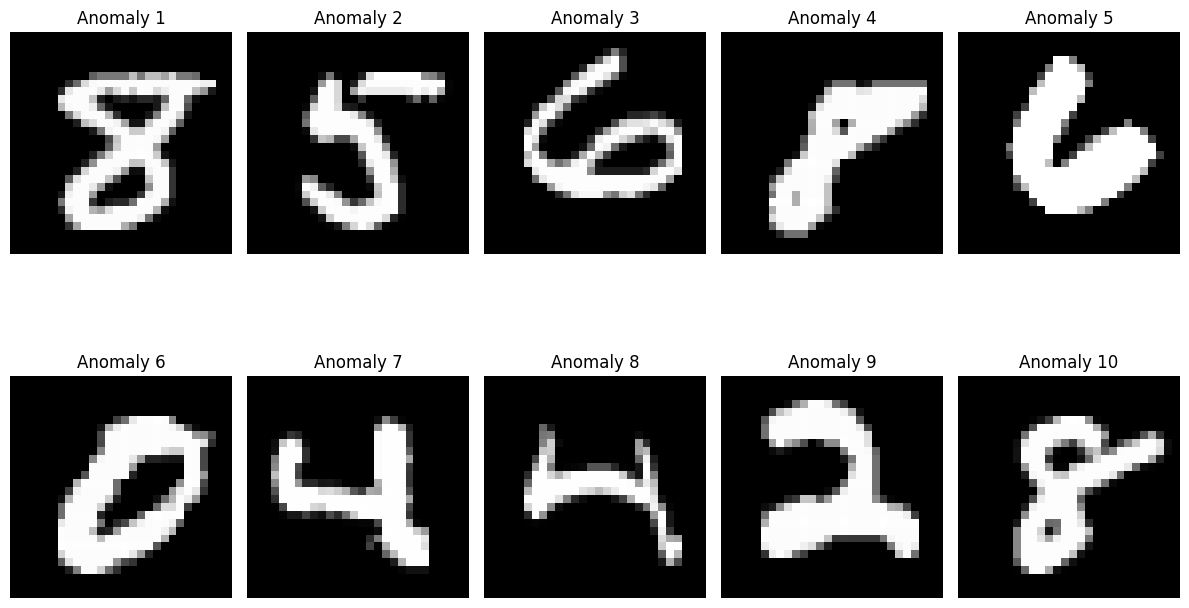

In [13]:
# Plot some of the anomalies
plt.figure(figsize=(12, 8))
for i, idx in enumerate(anomaly_indexes[:10]):  # Plot the first 10 anomalies
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_reshaped[idx], cmap='gray')
    plt.title(f'Anomaly {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

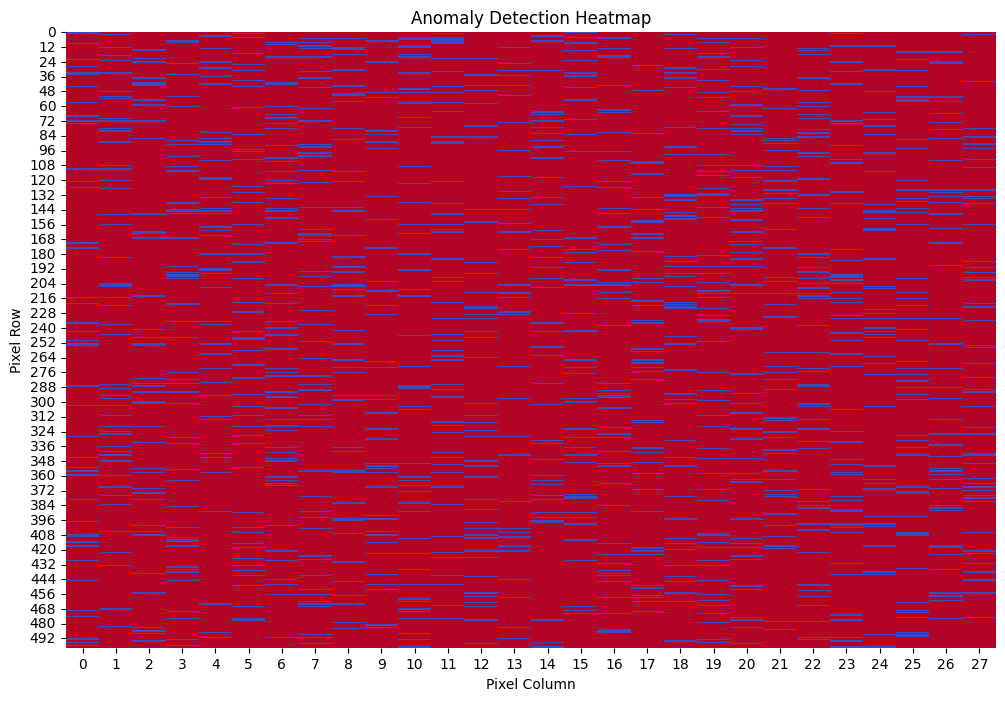

In [14]:
# Create a heatmap of anomalies
plt.figure(figsize=(12, 8))
sns.heatmap(prediction.reshape(-1, 28), cmap='coolwarm', cbar=False)
plt.title('Anomaly Detection Heatmap')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()

In [15]:
# Calculate advanced evaluation metrics
anomaly_scores = model.decision_function(x_test)

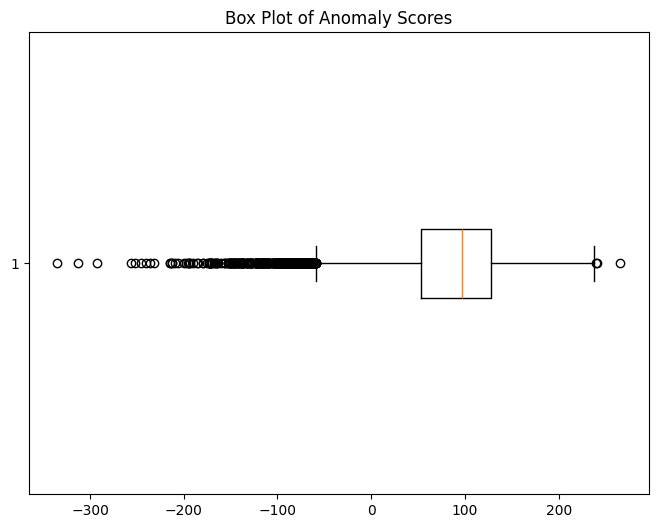

In [16]:
# Create a box plot of anomaly scores
plt.figure(figsize=(8, 6))
plt.boxplot(anomaly_scores, vert=False)
plt.title('Box Plot of Anomaly Scores')
plt.show()